In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy import stats

In [4]:
#initialisation fichier
df = pd.read_csv("Sample_-_Superstore.csv", encoding="latin1")  # ou essayez "ISO-8859-1" ou "cp1252"
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
# Assistant
#initialisation fichier
df = pd.read_csv("Sample_-_Superstore.csv", encoding="latin1") 
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#Valeurs manquantes
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
# Initialisation fichier avec l'encodage approprié
df = pd.read_csv("Sample_-_Superstore.csv", encoding="latin1")

# Vérifier les doublons
doublons = df.duplicated()
print(f"Nombre total de doublons : {doublons.sum()}")

# Afficher les lignes en double
print("\nLignes en double :")
print(df[doublons])

# Pour vérifier les doublons basés sur certaines colonnes spécifiques
# Par exemple, si vous voulez vérifier les doublons basés sur 'ID' et 'Product'
# doublons_specifiques = df.duplicated(subset=['ID', 'Product'])
# print(f"Nombre de doublons basés sur ID et Product : {doublons_specifiques.sum()}")
# print(df[doublons_specifiques])

Nombre total de doublons : 0

Lignes en double :
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


In [9]:
# Nombre de lignes dupliquées
df.duplicated().sum()

# Voir les doublons
df[df.duplicated()]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [10]:
df.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [11]:
# Valeurs manquantes par colonne
missing_values = df.isnull().sum()
print(missing_values)

# Pourcentage de valeurs manquantes
missing_percent = (df.isnull().mean() * 100).round(2)
print(missing_percent)


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64


In [12]:
# Vérifier les types
print(df.dtypes)

# Correction si nécessaire
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [13]:
# Ship Date avant Order Date ? -> incohérence
df[df['Ship Date'] < df['Order Date']]

# Quantité négative ?
df[df['Quantity'] < 0]

# Prix, Profit négatif (selon contexte)
df[df['Sales'] <= 0]
df[df['Profit'] < 0]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,9921,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Bryan,...,77803,Central,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,-35.8176
9921,9922,CA-2014-111360,2014-11-24,2014-11-30,Standard Class,AT-10435,Alyssa Tate,Home Office,United States,Akron,...,44312,East,OFF-BI-10003350,Office Supplies,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,-4.5936
9931,9932,CA-2015-104948,2015-11-13,2015-11-17,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
9937,9938,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772


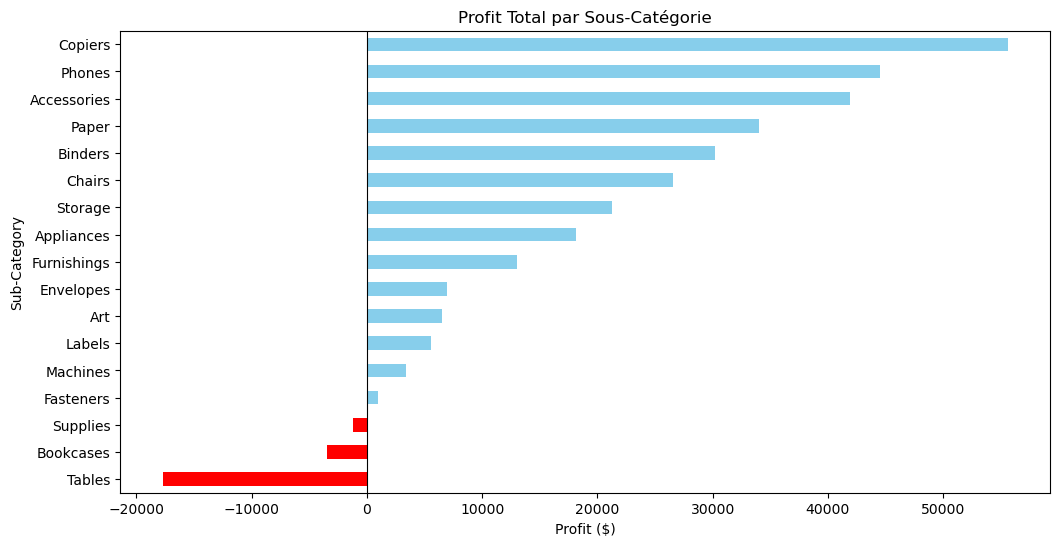

In [15]:
plt.figure(figsize=(12, 6))
# Calcul du profit moyen par sous-catégorie et tri
profit_by_sub = df.groupby('Sub-Category')['Profit'].sum().sort_values()

# Création d'une palette de couleurs : Rouge si négatif, Bleu si positif
colors = ['red' if x < 0 else 'skyblue' for x in profit_by_sub]

profit_by_sub.plot(kind='barh', color=colors)
plt.title('Profit Total par Sous-Catégorie')
plt.axvline(0, color='black', linewidth=0.8) # Ligne à zéro
plt.xlabel('Profit ($)')
plt.show()

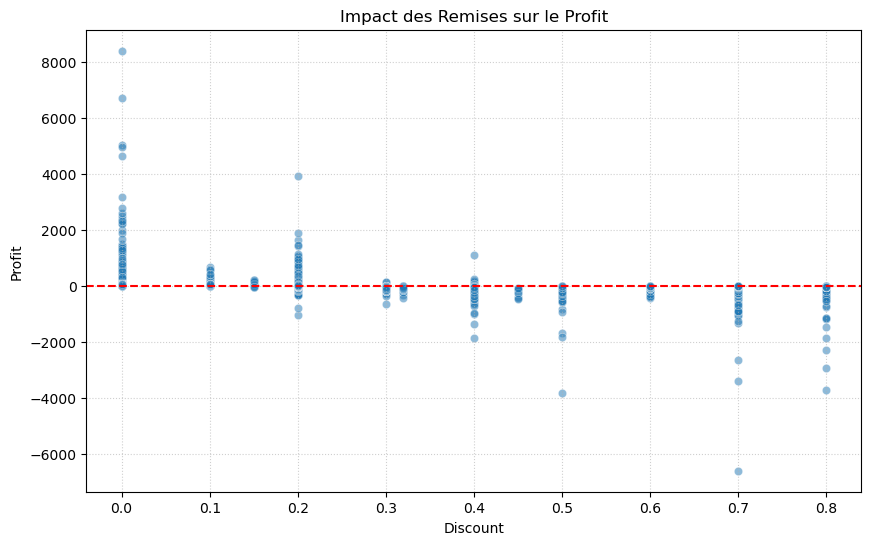

In [23]:
# Séparation entre les deux blocs de code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title('Impact des Remises sur le Profit')
plt.axhline(0, color='red', linestyle='--') # Ligne de perte
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

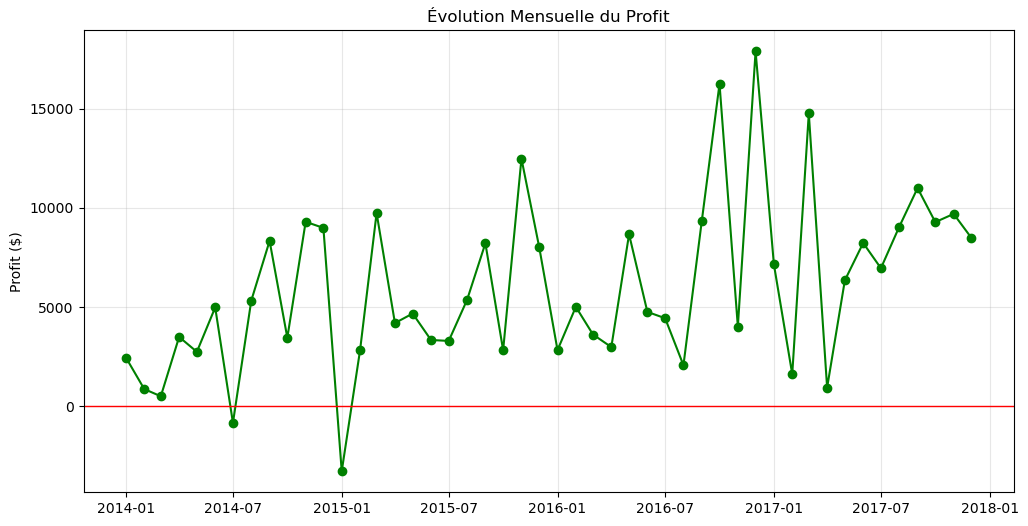

In [18]:
plt.figure(figsize=(12, 6))
# Grouper par mois
df_temp = df.set_index('Order Date')
monthly_profit = df_temp['Profit'].resample('MS').sum()

plt.plot(monthly_profit.index, monthly_profit.values, marker='o', linestyle='-', color='green')
plt.axhline(0, color='red', linewidth=1)
plt.title('Évolution Mensuelle du Profit')
plt.ylabel('Profit ($)')
plt.grid(True, alpha=0.3)
plt.show()

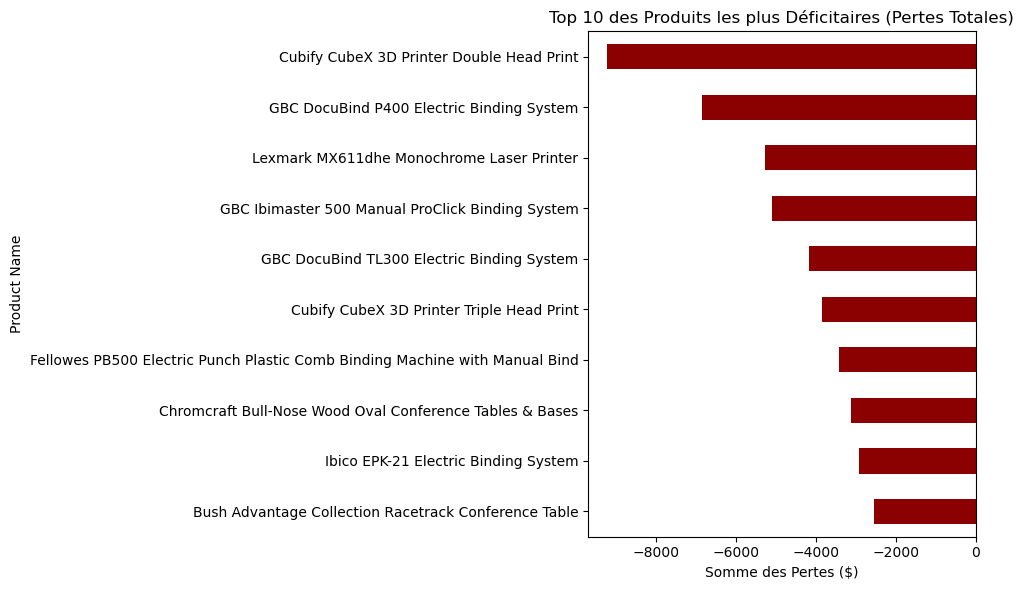

In [21]:
# Filtrer uniquement les profits négatifs
pertes = df[df['Profit'] < 0]

# Grouper par produit et prendre les 10 plus grosses pertes totales
top_losses = pertes.groupby('Product Name')['Profit'].sum().sort_values().head(10)

plt.figure(figsize=(10, 6))
top_losses.plot(kind='barh', color='darkred')
plt.title('Top 10 des Produits les plus Déficitaires (Pertes Totales)')
plt.xlabel('Somme des Pertes ($)')
plt.gca().invert_yaxis() # Pour avoir la plus grosse perte en haut
plt.tight_layout()
plt.show()